# Background

Introduction ..d
fad 

# Import Packages

In [101]:
import numpy as np
import pandas as pd

# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

# import xgboost
import xgboost as xgb

# Load Data

In [63]:
like_songs = pd.read_csv('../data/liked spotify songs.csv')
dislike_songs = pd.read_csv('../data/disliked spotify songs.csv')

In [64]:
like_songs.shape

(100, 16)

In [65]:
dislike_songs.shape

(100, 16)

In [66]:
# First 5 songs in Spotify playlist with our liked songs
like_songs.head(3)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Tom Lee Hong Kong Youth NeoWinds Orchestra,"2011 WASBE Chiayi City, Taiwan: Tom Lee Hong K...","Hymn to the Sun, ""With the Beat of Mother Earth""",4olLv2XSxKmEYFeA6JtuJ2,0.161,0.293,7,-15.691,0,0.0415,0.569000,0.6610,0.0572,78.331,561640,4
1,LANY,Malibu Nights,Malibu Nights,0Eqg0CQ7bK3RQIMPw1A7pl,0.559,0.422,11,-11.890,1,0.1950,0.000002,0.0853,0.1910,74.002,286928,4
2,Ed Sheeran,+,Give Me Love,0SuG9kyzGRpDqrCWtgD6Lq,0.526,0.328,1,-9.864,1,0.0461,0.000000,0.1120,0.1100,116.068,526387,4


In [67]:
# Last 5 songs in Spotify playlist with our liked songs
like_songs.tail(3)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
97,Baek Ji Young,I still love you a lot,I still love you a lot,2zCORPZHF7g9SPjZfrGVuy,0.548,0.404,4,-5.618,1,0.0314,0.00000,0.0791,0.486,129.795,227867,4
98,TOTO,Toto IV,Africa,2374M0fQpWi3dLnB54qaLX,0.671,0.373,9,-18.064,1,0.0323,0.00008,0.0481,0.732,92.718,295893,4
99,Avril Lavigne,Goodbye Lullaby (Deluxe Edition),Wish You Were Here,72po8JKu6e1hLtQ7kGJPg3,0.460,0.866,1,-3.864,0,0.0559,0.00000,0.1900,0.345,165.956,225680,4


In [68]:
# First 5 songs in Spotify playlist with our disliked songs
dislike_songs.head(3)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Katy Perry,Smile,Cry About It Later,7cLrrJ1Dk6WAQyDIj9j26A,0.699,0.669,2,-5.829,0,0.0712,0.000017,0.248,0.4440,125.994,189773,4
1,Meghan Trainor,TREAT MYSELF (DELUXE),You Don't Know Me,3xGTNPcwsvonkWUQV1Wsqu,0.579,0.763,9,-4.155,0,0.0717,0.000000,0.205,0.6170,106.029,210834,4
2,Justin Bieber,Lonely (with benny blanco),Lonely (with benny blanco),4y4spB9m0Q6026KfkAvy9Q,0.631,0.239,11,-7.071,0,0.0398,0.000000,0.116,0.0927,79.859,149297,4


In [69]:
# Last 5 songs in Spotify playlist with our disliked songs
dislike_songs.tail(3)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
97,Halsey,Manic,You should be sad,7lidXGPXPYLNThITAOTlkK,0.591,0.585,2,-6.350,1,0.0277,0.000000,0.109,0.324,110.940,205473,4
98,H.E.R.,Sometimes,Sometimes,2m0pzukUN2eFutFjnXNFXF,0.540,0.617,3,-7.560,0,0.0723,0.000854,0.109,0.369,151.838,273751,4
99,Chris Brown,Slime & B,Go Crazy,1IIKrJVP1C9N7iPtG6eOsK,0.755,0.578,0,-8.932,0,0.1450,0.000000,0.250,0.581,94.148,176960,4


# Preliminary Analysis

In [70]:
# Columns in our dataset
like_songs.columns

Index(['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [71]:
# Describing the columns in our liked songs dataset
like_songs.describe()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.551960,0.523324,5.430000,-7.867940,0.830000,0.057327,0.045659,0.200942,0.373591,119.756020,260022.800000,3.940000
std,0.151527,0.199619,3.593639,3.473365,0.377525,0.048058,0.171749,0.180012,0.211411,29.301727,88006.034145,0.238683
min,0.161000,0.092400,0.000000,-18.064000,0.000000,0.024300,0.000000,0.033300,0.057200,71.994000,160347.000000,3.000000
25%,0.467500,0.381250,2.000000,-9.537750,1.000000,0.032375,0.000000,0.096600,0.190000,94.411750,208673.750000,4.000000
50%,0.553500,0.485000,5.500000,-7.150500,1.000000,0.041850,0.000002,0.116000,0.334000,119.930000,235966.500000,4.000000
75%,0.667000,0.655000,8.000000,-5.660750,1.000000,0.059725,0.000133,0.237750,0.493500,138.633750,283189.750000,4.000000
max,0.897000,0.941000,11.000000,-0.323000,1.000000,0.360000,0.913000,0.795000,0.884000,192.099000,663333.000000,4.000000


**Observations:**
- The longest song is 663333ms, which is ~11mins.
- Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. Among the 100 songs, danceability has a mean of 0.55. This could mean that our songs are pretty balanced in terms of rhythm and tempo.

# Preprocessing

In [72]:
# classification, 1 for like, 0 for dislike
# Adding the song_like column to our liked songs dataframe
like_songs['song_like'] = 1
like_songs.tail()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
95,JJ Lin,JJ林俊傑100天,第幾個100天,2tXTEROacuvyybcZoX9RmT,0.247,0.475,0,-6.658,1,0.0286,0.00000,0.1300,0.201,96.429,278895,3,1
96,Cass Elliot,Dream A Little Dream Of Me,Dream A Little Dream Of Me,3cOWCcBKwiwUs5PCYirwMI,0.410,0.532,11,-10.394,0,0.1950,0.00000,0.6980,0.406,134.128,221373,4,1
97,Baek Ji Young,I still love you a lot,I still love you a lot,2zCORPZHF7g9SPjZfrGVuy,0.548,0.404,4,-5.618,1,0.0314,0.00000,0.0791,0.486,129.795,227867,4,1
98,TOTO,Toto IV,Africa,2374M0fQpWi3dLnB54qaLX,0.671,0.373,9,-18.064,1,0.0323,0.00008,0.0481,0.732,92.718,295893,4,1
99,Avril Lavigne,Goodbye Lullaby (Deluxe Edition),Wish You Were Here,72po8JKu6e1hLtQ7kGJPg3,0.460,0.866,1,-3.864,0,0.0559,0.00000,0.1900,0.345,165.956,225680,4,1


In [73]:
# Adding the song_like column to our disliked songs dataframe
dislike_songs['song_like'] = 0
dislike_songs.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
0,Katy Perry,Smile,Cry About It Later,7cLrrJ1Dk6WAQyDIj9j26A,0.699,0.669,2,-5.829,0,0.0712,0.000017,0.2480,0.4440,125.994,189773,4,0
1,Meghan Trainor,TREAT MYSELF (DELUXE),You Don't Know Me,3xGTNPcwsvonkWUQV1Wsqu,0.579,0.763,9,-4.155,0,0.0717,0.000000,0.2050,0.6170,106.029,210834,4,0
2,Justin Bieber,Lonely (with benny blanco),Lonely (with benny blanco),4y4spB9m0Q6026KfkAvy9Q,0.631,0.239,11,-7.071,0,0.0398,0.000000,0.1160,0.0927,79.859,149297,4,0
3,Shawn Mendes,Monster,Monster (Shawn Mendes & Justin Bieber),2Z8yfpFX0ZMavHkcIeHiO1,0.652,0.383,2,-7.076,0,0.0516,0.000000,0.0828,0.5490,145.765,178994,4,0
4,Justin Bieber,Purpose (Deluxe),Love Yourself,1f8zcJPvJKvxAOjEqM0pyc,0.609,0.378,4,-9.828,1,0.4380,0.000000,0.2800,0.5150,100.418,233720,4,0


In [74]:
# Combine the liked_songs and disliked_songs dataframe
songs = like_songs.append(dislike_songs,ignore_index=False)
songs.shape

(200, 17)

In [75]:
# Drop duplicated songs
songs = songs.drop_duplicates()
songs.shape

(200, 17)

In [76]:
# drop track_name and artist cuz we are going to build a model
# we do not drop previously, cuz we will need track_name and artist to 
# show case our results
df = songs.drop(['track_name','artist','track_id','album'], axis = 1)

In [77]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
0,0.161,0.293,7,-15.691,0,0.0415,0.569000,0.6610,0.0572,78.331,561640,4,1
1,0.559,0.422,11,-11.890,1,0.1950,0.000002,0.0853,0.1910,74.002,286928,4,1
2,0.526,0.328,1,-9.864,1,0.0461,0.000000,0.1120,0.1100,116.068,526387,4,1
3,0.318,0.219,7,-17.426,0,0.0406,0.913000,0.7760,0.2930,134.380,500973,4,1
4,0.709,0.220,7,-11.856,1,0.0327,0.000000,0.1750,0.5300,110.076,219040,4,1


# Exploratory Data Analysis

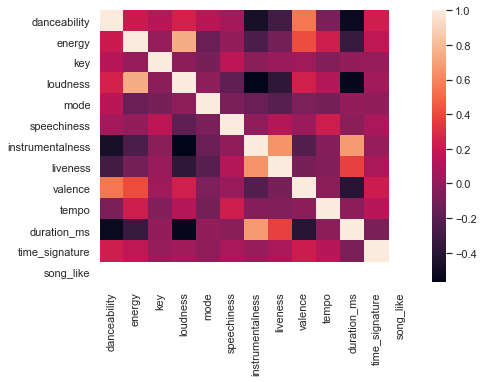

In [78]:
# Сorrelation matrix
plt.figure(figsize=[7,5])
sns.heatmap(like_songs.corr())
plt.show()

Based on correlation plot, `loudness` and `energy` are very correlated. This makes sense because we can infer that high energy songs are usually loud in character.

Text(0.5, 1.0, 'Artist Name vs Count of songs')

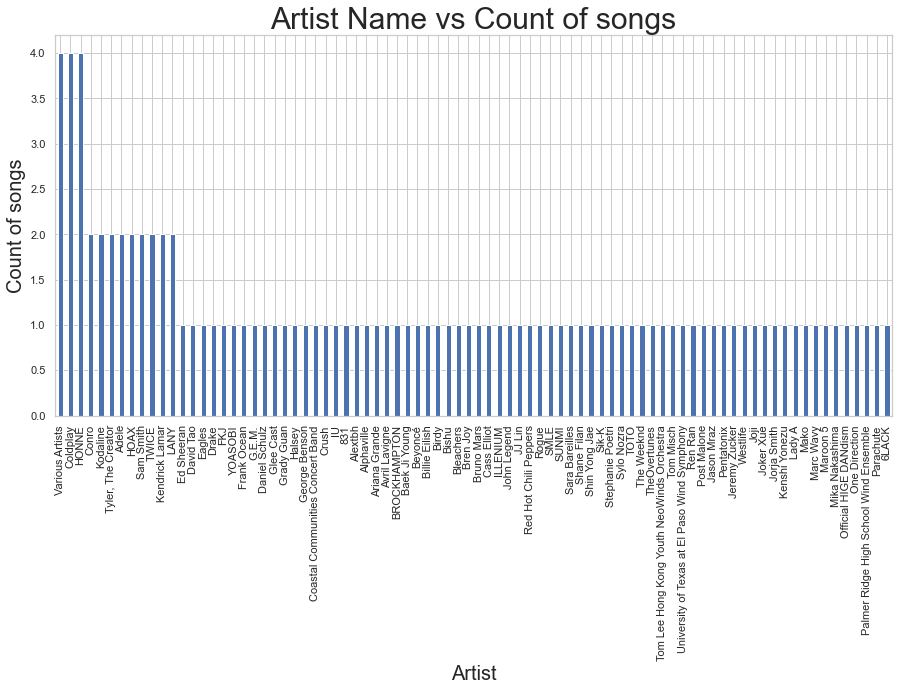

In [79]:
# Bar chart showing artists with a higher song count in our liked songs playlist
fig = plt.figure(figsize = (15,7))
like_songs.groupby('artist')['track_name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Artist Name vs Count of songs', fontsize = 30)

In [80]:
# Object data to category
for col in like_songs.select_dtypes(include=['object']).columns:
    like_songs[col] = like_songs[col].astype('category')
    
# Encoding categorical features
for col in like_songs.select_dtypes(include=['category']).columns:
    like_songs[col] = like_songs[col].cat.codes

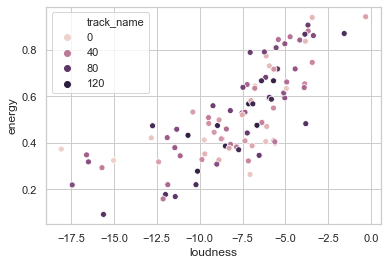

In [81]:
# Scatter plot showing relationship between loudness and energy of our liked songs
sns.scatterplot(data=like_songs, x='loudness', y='energy', hue='track_name')

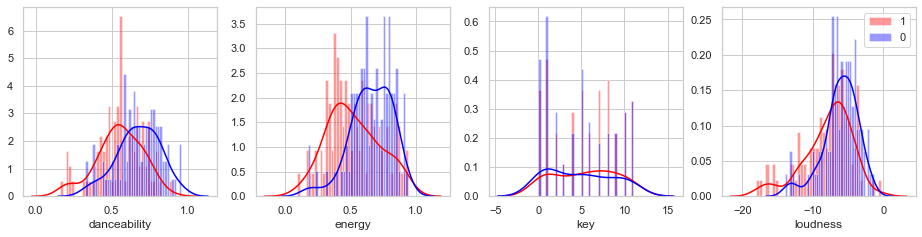

In [82]:
# Visualization of danceability, energy, key and loudness song data
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['danceability'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['energy'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['key'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['loudness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

**Observations**:
- For liked songs, `danceability` and `energy` has a lower mean than that of unliked songs. This implies that these liked songs have a lower `danceability` and `energy` score, which could mean soothing, calming songs. 
- As for `loudness`, both liked and unliked songs have roughly similar distributions (left-skew).

/Users/longwind48/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/longwind48/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


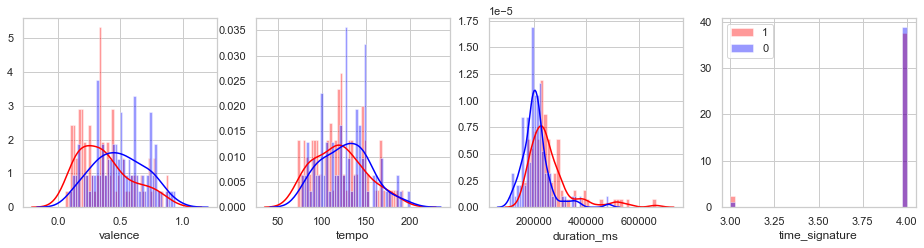

In [83]:
 # Visualization of valence, tempo, duration_ms and time signature data
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['valence'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['tempo'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['duration_ms'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['duration_ms'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['time_signature'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))

Text(0.5, 0, 'artist')

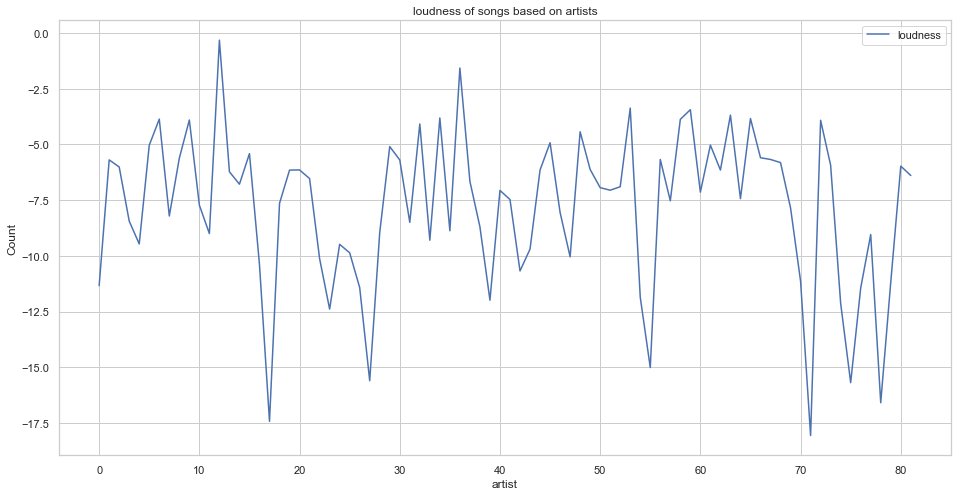

In [84]:
# Loudness of songs based on artists
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = like_songs.groupby("artist")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('loudness of songs based on artists')
ax.set_ylabel('Count')
ax.set_xlabel('artist')

# Modelling

In [86]:
X = df.drop('song_like', axis=1)
y = df['song_like']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
X_train.shape

(134, 12)

In [91]:
y_train.shape

(134,)

In [89]:
X_test.shape

(66, 12)

In [92]:
y_test.shape

(66,)

## Logistic Regression

In [93]:
# create model and fitted over the data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [94]:
lr_pred = lr_model.predict(X_test)
print(confusion_matrix(y_test, lr_pred))
print('\n') # space
print(classification_report(y_test, lr_pred))

[[19 12]
 [14 21]]


              precision    recall  f1-score   support

           0       0.58      0.61      0.59        31
           1       0.64      0.60      0.62        35

    accuracy                           0.61        66
   macro avg       0.61      0.61      0.61        66
weighted avg       0.61      0.61      0.61        66



**Observations:**
-  Accuracy of this model is 61%.
- F1-score of like and unlike predictions are quite similar, (0.59 vs 0.62). This is expected because we have a balanced class distribution.

Checking the model by analyze its performance with confusion matrix and classification report
1. precision --> correctly predicted positive observations to the total predicted positive observations
2. recall --> ratio of correctly predicted positive observations to all observations
3. f1 score --> weighted average of precision and recall (accuracy of the model)

## K-Nearest Neighbours (KNN)

In [96]:
# train vanilla knn
knn_model = KNeighborsClassifier() 
knn_model.fit(X_train, y_train) 

KNeighborsClassifier()

In [97]:
# checking the model performances
knn_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

[[19 12]
 [13 22]]


              precision    recall  f1-score   support

           0       0.59      0.61      0.60        31
           1       0.65      0.63      0.64        35

    accuracy                           0.62        66
   macro avg       0.62      0.62      0.62        66
weighted avg       0.62      0.62      0.62        66



..dsfa
sdfa

## XG Boost

In [102]:
# create model and fitted
xgb_model = xgb.XGBClassifier(learning_rate=0.2, 
                              max_depth=10, 
                              min_child_weight=10, 
                              n_estimators=250)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
# checking the model performances
xgb_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test,xgb_pred))
print('')
print(classification_report(y_test, xgb_pred))

[[24  7]
 [12 23]]

              precision    recall  f1-score   support

           0       0.67      0.77      0.72        31
           1       0.77      0.66      0.71        35

    accuracy                           0.71        66
   macro avg       0.72      0.72      0.71        66
weighted avg       0.72      0.71      0.71        66



dfalkjndlakfd

As expected, tree-boosting algorithms like Xgboost yields the best performance, compared to logistic regression and KNN. 

Insert reasons.

In [107]:
len(songs)

200

In [133]:
X_test['y_pred'] = xgb_pred
X_test['y_true'] = y_test

<ipython-input-133-fa1feedf77ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_pred'] = xgb_pred
<ipython-input-133-fa1feedf77ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_true'] = y_test


In [119]:
X_test.head(2)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,y_pred,y_true
95,0.247,0.475,0,-6.658,1,0.0286,0.0,0.130,0.201,96.429,278895,3,1,1
15,0.795,0.178,0,-11.991,1,0.0574,0.0,0.623,0.608,93.982,181613,4,1,1


In [123]:
X_test['is_correct'] = X_test.apply(lambda row: True if row['y_pred']==row['y_true'] else False, axis=1)

<ipython-input-123-f6f1e09c1771>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['is_correct'] = X_test.apply(lambda row: True if row['y_pred']==row['y_true'] else False, axis=1)


In [124]:
X_test['is_correct'].value_counts()

True     47
False    19
Name: is_correct, dtype: int64

In [126]:
X_test[X_test['is_correct']].index

Int64Index([95, 15, 30, 58, 28, 15, 69, 70, 74, 66, 82, 65, 86, 77, 56, 52, 82,
            68, 24, 93, 65, 84, 67, 25, 32, 55, 50, 35, 64, 76, 38, 24, 95, 29,
            19, 43, 14, 73, 26, 73, 40, 98, 72, 69, 97, 31, 12],
           dtype='int64')

In [129]:
# songs that we predicted correctly
songs.loc[X_test[X_test['is_correct']].index].head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
95,JJ Lin,JJ林俊傑100天,第幾個100天,2tXTEROacuvyybcZoX9RmT,0.247,0.475,0,-6.658,1,0.0286,0.000000,0.130,0.201,96.429,278895,3,1
95,Brent Faiyaz,Fuck The World,Let Me Know,0dJhXJKZTpiaxTUc7uItIN,0.743,0.548,6,-6.545,0,0.0947,0.000180,0.088,0.558,85.017,215058,4,0
15,Jeremy Zucker,"summer,",comethru,18uwL0vNUanqZH0ro2QcOP,0.795,0.178,0,-11.991,1,0.0574,0.000000,0.623,0.608,93.982,181613,4,1
15,Katy Perry,PRISM,Roar,27tNWlhdAryQY04Gb2ZhUI,0.671,0.771,7,-4.821,0,0.0316,0.000007,0.354,0.436,90.003,223546,4,0
30,Official HIGE DANdism,Pretender,Pretender,1OBAWkIciXl8rmbKtrp9ZG,0.526,0.860,8,-3.370,1,0.0270,0.000000,0.129,0.403,91.955,326440,4,1


In [130]:
# songs that we predicted incorrectly
songs.loc[X_test[~X_test['is_correct']].index].head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_like
45,Maroon 5,V (Asia Tour Edition),Sugar,5d6Mjuu2uCGRPYpFjGpCX5,0.748,0.788,1,-7.055,1,0.0334,0.000000,0.0863,0.884,120.076,235493,4,1
45,GD X TAEYANG,GOOD BOY,GOOD BOY,3F1mueW8iouZUgjmawhVhe,0.745,0.825,1,-3.162,0,0.0352,0.000218,0.0828,0.242,95.001,245192,4,0
78,Bren Joy,Twenties,Henny in the Hamptons,19NKbRV1zevCIzePp88Wzh,0.631,0.634,1,-6.786,0,0.1150,0.000000,0.1680,0.479,87.903,197375,4,1
78,Shamir,On My Own,On My Own,4AE5On9A262Wg8zm3st3De,0.624,0.863,1,-5.012,0,0.0395,0.001260,0.0917,0.636,100.013,251464,4,0
16,HONNE,Love Me / Love Me Not,Location Unknown ◐,6A1GBCMwbfhkB9e1thR8a8,0.682,0.650,5,-7.231,1,0.0457,0.000009,0.0947,0.378,109.986,290385,4,1


# Conclusion